In [1]:
import pandas as pd
import os

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [11]:
metadata_df = pd.read_csv(os.path.expanduser("~/git/scalable-nilm/create_dataset/metadata/metadata.csv"),index_col=0)

In [13]:
metadata_df.head()

,active_record,building_type,program_579,program_baseline,program_energy_internet_demo,program_lg_appliance,program_verizon,program_ccet_group,program_civita_group,city,...,refrigerator1,refrigerator2,security1,shed1,sprinkler1,utilityroom1,venthood1,waterheater1,waterheater2,winecooler1
dataid,,,,,,,,,,,,,,,,,,,,,
2836,NaN,Single-Family Home,NaN,NaN,yes,NaN,NaN,NaN,NaN,Austin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2743,NaN,Single-Family Home,NaN,NaN,yes,NaN,NaN,NaN,NaN,Austin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5323,NaN,Single-Family Home,NaN,yes,yes,NaN,NaN,NaN,NaN,Austin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8560,NaN,Single-Family Home,NaN,yes,yes,NaN,NaN,NaN,NaN,Austin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3313,NaN,Single-Family Home,NaN,yes,yes,NaN,NaN,NaN,NaN,Austin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
store = pd.HDFStore(os.path.expanduser("~/all.h5"))

In [16]:
metadata_df.city.value_counts().head(10)

Austin         881
Houston         66
Boulder         58
San Diego       57
Dallas          51
San Antonio     30
Arlington       21
Fort Worth      20
Plano           19
Round Rock      10
Name: city, dtype: int64

In [17]:
all_cities = ["San Diego", "Boulder", "Austin", "Houston", "Dallas","San Antonio","Arlington"]

In [30]:
a = store['/%d' %26].resample("1M")

In [34]:
from collections import Counter
counter_dict = {}
for city in all_cities:
    print city
    only_city_df = metadata_df[metadata_df['city'] == city]
    counter_dict[city] = Counter()
    for building in only_city_df.index:
        try:
            counter_dict[city].update(store['/%d' %building].resample("1M").index)
        except Exception, e:
            pass
    counter_dict[city] = pd.Series(counter_dict[city])
    
    


San Diego


/home/nipun/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)


Boulder
Austin
Houston
Dallas
San Antonio
Arlington


In [35]:
import sys


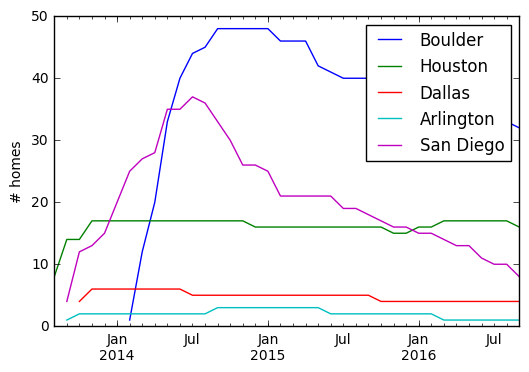

In [36]:
ax = plt.gca()
for k, v in counter_dict.iteritems():
    try:
        if k!='Austin':
            pd.Series(v).plot(label=k, ax=ax)
    except:
        pass
plt.legend()
plt.ylabel("# homes")

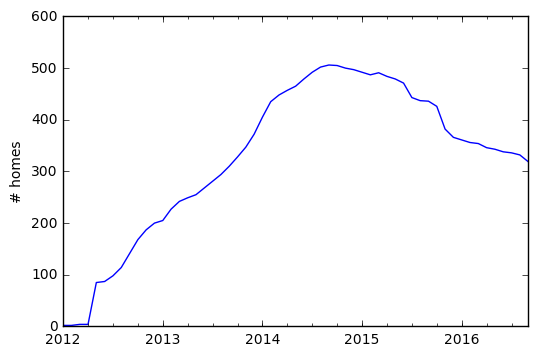

In [37]:
pd.Series(counter_dict['Austin']).plot()
plt.ylabel("# homes")

In [40]:
stream_counter_dict = {}
for city in all_cities:
#for city in ["Austin"]:
    print city
    only_city_df = metadata_df[metadata_df['city'] == city]
    stream_counter_dict[city] = Counter()
    for building in only_city_df.index:
        try:
            stream_counter_dict[city].update(store['/%d' %building].columns)
        except:
            pass
    #stream_counter_dict[city] = pd.Series(counter_dict[city])
    
    

San Diego
Boulder
Austin
Houston
Dallas
San Antonio
Arlington


In [44]:
streams_df = pd.DataFrame(stream_counter_dict)

In [45]:
streams_df = streams_df.drop('San Antonio', axis=1).dropna()
streams_df.index = ['HVAC','Washing Machine','Dish Washer','Furnace','Kitchen 1','Kitchen 2','Microwave','Oven','Fridge','Aggregate']
streams_df.astype('int')

,Arlington,Austin,Boulder,Dallas,Houston,San Diego
HVAC,2,505,38,6,21,40
Washing Machine,3,284,30,4,12,19
Dish Washer,2,393,41,5,15,40
Furnace,3,451,39,5,15,42
Kitchen 1,2,310,27,3,4,40
Kitchen 2,1,224,14,2,5,25
Microwave,1,282,19,2,7,40
Oven,2,149,19,2,12,20
Fridge,1,428,40,4,12,40
Aggregate,3,589,47,6,21,42


In [47]:
import seaborn as sns

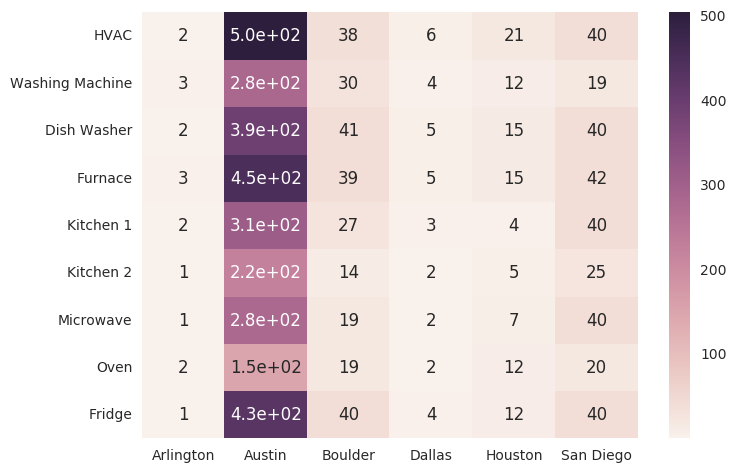

In [49]:
sns.heatmap(streams_df.dropna().drop("Aggregate"), annot=True)
plt.savefig("../results/large_dataset_cities_streams.pdf", bbox_inches="tight")
plt.savefig("../results/large_dataset_cities_streams.png", bbox_inches="tight")

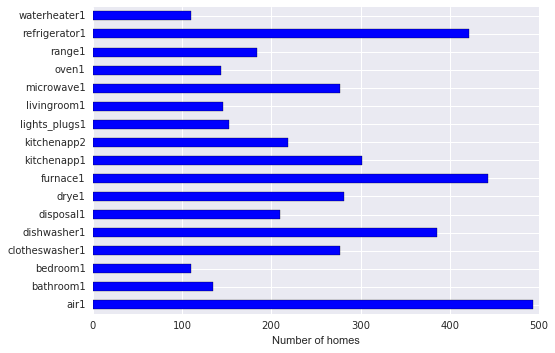

In [18]:
austin = streams_df["Austin"]
austin[austin>100].drop('use').plot(kind="barh")
plt.xlabel("Number of homes")
plt.savefig("../results/large_dataset_austin_streams.pdf", bbox_inches="tight")
plt.savefig("../results/large_dataset_austin_streams.png", bbox_inches="tight")

In [19]:
!ls ~/git/nilm-actionable/data/total/

audits_2011.csv                   audits_2013_duct_leakage_eval.csv dataport-metadata.csv             survey_2013.csv
audits_2013_appliances.csv        audits_2013_main.csv              survey_2011_all_participants.csv


In [52]:
columns_to_use = {
    'survey_2011_all_participants.csv': [
        'males',
        'females',
        'age_under_5',
        'age_6_to_12',
        'age_13_to_18',
        'age_19_to_24',
        'age_25_to_34',
        'age_35_to_49',
        'age_50_to64',
        'age_over_65',
        'highest_education',
        'income_range',
        ],
    'survey_2013.csv': [
        'number_floors',
        'house_num_rooms',
        'house_square_feet',
        'sex_males',
        'sex_females',
        'residents_under_5',
        'residents_6_to_12',
        'residents_13_to_18',
        'residents_19_to_24',
        'residents_25_to_34',
        'residents_35_to_49',
        'residents_50_to_64',
        'residents_older_65',
        'education_level',
        'total_annual_income',
        ],
    'audits_2011.csv': ['no_bedrooms', 'year_built'],
    'audits_2013_main.csv': ['Number_of_Floors__c',
                             'Number_of_Bedrooms__c',
                             'Construction_Year__c'],
    'metadata.csv':['house_construction_year',
                             'total_square_footage',
                            'building_type',
                             'first_floor_square_footage',
                            'second_floor_square_footage',
                            'third_floor_square_footage']
    }




In [53]:
metadata_dataframes = {filename: pd.read_csv(os.path.expanduser('~/git/scalable-nilm/create_dataset/metadata/%s' %filename)) for filename in columns_to_use.keys()}

### Finding how much metadata we have for each city

In [54]:
metadata_dataframes.keys()

['survey_2013.csv',
 'survey_2011_all_participants.csv',
 'audits_2013_main.csv',
 'audits_2011.csv',
 'metadata.csv']

In [55]:
counter_dict = {}
out = {}
for city in all_cities:
#for city in ["San Diego"]:
    out[city] = {}

    
    print city
    only_city_df = metadata_df[metadata_df['city'] == city]
    counter_dict[city] = Counter()
    for building in only_city_df.index[:]:
        try:
            building=int(building)
            out[city][building] = {}
            for metadata_filename, metadata_columns in columns_to_use.iteritems():
                
                mdf = metadata_dataframes[metadata_filename]
                
                mdf_building = mdf[mdf.dataid==building].head(1)[metadata_columns]
                
                out[city][building].update(mdf_building.squeeze().to_dict())
                
                
                
            
        except Exception, e:
            print e
    
    

San Diego
Boulder
Austin
Houston
Dallas
San Antonio
Arlington


In [56]:
common_columns = {'year_built':['year_built','house_construction_year','Construction_Year__c'],
                 'area':['house_square_feet','total_square_footage'],
                  'area_first':['first_floor_square_footage'],
                  'area_second':['second_floor_square_footage'],
                    'area_third':['third_floor_square_footage'],
                 'num_floors':['Number_of_Floors__c','number_floors'],
                 'num_bedrooms':['Number_of_Bedrooms__c','no_bedrooms'],
                 'num_males':['males','sex_males'],
                 'num_females':['females','sex_females'],
                 'age_13_to_18':['age_13_to_18','residents_13_to_18'],
                 'age_19_to_24':['age_19_to_24','residents_19_to_24'],
                  'age_25_to_34':['age_25_to_34','residents_25_to_34'],
                  'age_35_to_49':['age_35_to_49','residents_35_to_49'],
                  'age_50_to_64':['age_50_to64','residents_50_to_64'],
                  'age_over_65':['age_over_65','residents_older_65'],
                  'age_6_to_12':['age_6_to_12','residents_6_to_12'],
                  'age_under_5':['age_under_5','residents_under_5'],
                  'education_level':['education_level','highest_education'],
                  'income_range':['income_range','total_annual_income']
                  ,'building_type':['building_type']
                  
                  
                 }

In [57]:
odfs = {}
for city in all_cities:
    print city
    odfs[city] = pd.DataFrame(out[city])
    odfs[city] = odfs[city].replace([{}], [None])
    odf = odfs[city]
    odft = odf.T
    out_new = {}
    for common_key, common_list_columns in common_columns.iteritems():
        out_new[common_key]={}
        for home in odft.index:

            num_columns = len(common_list_columns)
            num_null = odft.ix[home][common_list_columns].isnull().sum()
            if num_columns==num_null:
                out_new[common_key][home]=None
            else:
                # Choose first not null
                out_new[common_key][home]=odft.ix[home][common_list_columns].dropna().head(1).values[0]

        for col in common_list_columns:

            odft = odft.drop(col, axis=1)
        odft[common_key] = pd.Series(out_new[common_key])
    odfs[city]=odft.T
    #odfs[city]=odft.T.notnull().sum(axis=1)

    

San Diego
Boulder
Austin
Houston
Dallas
San Antonio
Arlington


In [58]:
pd.DataFrame(odfs).plot(kind="bar", color=tableau20blind[::2], subplots=True, figsize=(12,8))
fig = plt.gcf()
fig.text(-0.02, 0.5, "Number of homes", va='center', rotation='vertical')

plt.tight_layout()
plt.savefig("../results/metadata.png", bbox_inches="tight")
plt.savefig("../results/metadata.pdf", bbox_inches="tight")

ValueError: If using all scalar values, you must pass an index

In [59]:
for city in odfs.keys():
    odfs[city] = odfs[city].ix[['house_num_rooms','num_males','num_females',
                                'area','num_bedrooms','num_floors','area_first',
                               'area_second','area_third']].T
    odfs[city] = odfs[city].replace({'5 or more':5})
    odfs[city] = odfs[city].replace({'One':1})
    odfs[city] = odfs[city].replace({'Two':2})
    odfs[city] = odfs[city].replace({'Three':3})
    odfs[city] = odfs[city].replace({'Four':4})
    odfs[city] = odfs[city].replace({'Five':5})
    odfs[city] = odfs[city].replace({"None":0})
    odfs[city] = odfs[city].astype('float64')
    odfs[city]["num_occupants"] = odfs[city].num_females+odfs[city].num_males
    odfs[city] = odfs[city].drop("num_males",1)
    odfs[city] = odfs[city].drop("num_females",1)
    #odfs[city] = odfs[city].query('num_occupants>0')



In [60]:
for city in odfs.keys():
    odfs[city].to_csv('metadata/%s_md.csv' %city.replace(" ",""))
    

In [61]:
a = {}
for city in odfs.keys():
    a[city] = odfs[city].count()

In [62]:
pd.DataFrame(a).T

,house_num_rooms,area,num_bedrooms,num_floors,area_first,area_second,area_third,num_occupants
Arlington,7,20,0,7,20,0,0,6
Austin,187,710,220,210,470,428,378,338
Boulder,0,52,0,0,48,38,0,0
Dallas,18,46,0,18,45,1,0,17
Houston,11,60,0,11,59,28,0,9
San Antonio,0,1,0,0,1,1,0,0
San Diego,10,28,10,14,8,0,0,9
